In [2]:
import os
os.chdir('./MantraNet')

import matplotlib.pyplot as plt
import gc

from mantranet import *

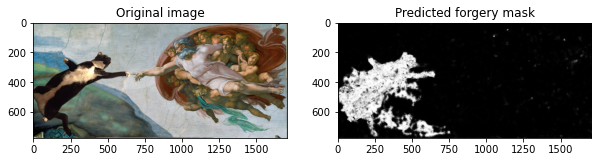

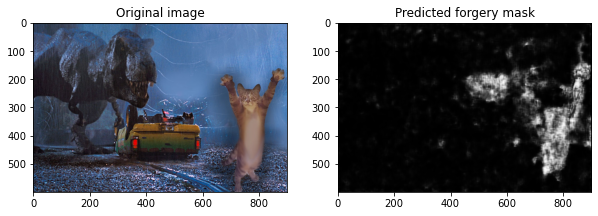

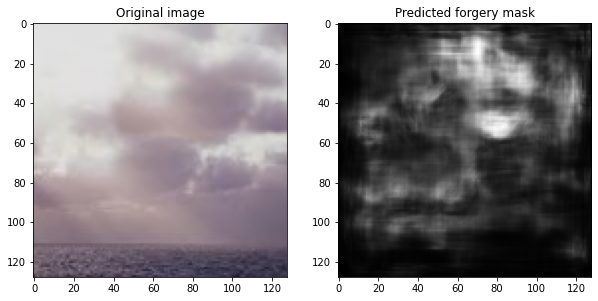

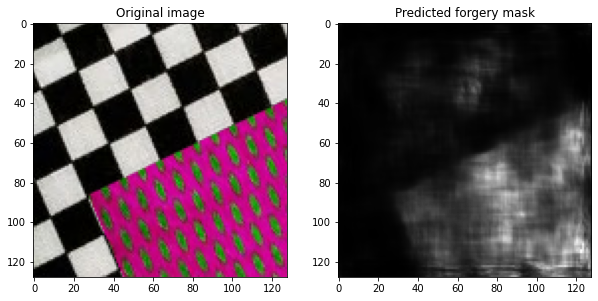

In [5]:
device='cpu' #to change if you have a GPU with at least 12Go RAM (it will save you a lot of time !)
model=pre_trained_model(weight_path='./MantraNetv4.pt',device=device)

for image in os.listdir('../Demo_images/'):

    plt.figure(figsize=(10,10))
    check_forgery(model,img_path=f'../Demo_images/{image}',device=device)